In [205]:
import pandas as pd
import numpy as np

In [206]:
data = pd.read_csv("loan_approved.csv")

In [207]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Feature data types:
loan_id : nominal

gender : nominal

married : nominal

dependents: odinal, discrete

education : nominal

self_employed : nominal

applicantIncome : continuous

coapplicantIncome : continuous

loanAmount : continuous

loan_amount_term : continuous

credit_history : odinal, discrete

loan_status : nominal

nominal:

Because they are just names or labels, and no category can be compared with the other.

odinal:

Because there is a sense of progression or hierarchy, even if the numeric gap isn’t consistent and catogeries can be compared

continuous:

Because these are measurements, not counts, and can vary smoothly.

discrete:

Because these represent counts or binary outcomes, not continuous measurements.

## How to identify types of data:
* categories of datatype for columns:
obejct, category, int, float, boolean, date-time
* use data.info()
* check one column at a time to check.



In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [209]:
print(len(data['Loan_ID'].unique()))
print(len(data['Gender'].unique()))

614
3


In [210]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [211]:
len(data['Dependents'].unique())

5

In [212]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [213]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [214]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [215]:
len(data['ApplicantIncome'].unique())

505

In [216]:
len(data['CoapplicantIncome'].unique())

287

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

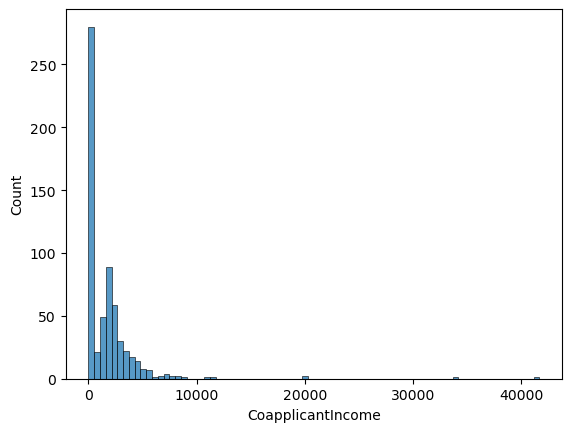

In [217]:
data['CoapplicantIncome'].isna().sum()
import seaborn as sns
sns.histplot(data['CoapplicantIncome'])

#### Feature engineering
CoApplicant unique values are only 287
Coapplicant who's income is zero is present. 
Such Coapplicants are of no use. Applicants have 505 unique values while coapplicants have only 287 uniques values.

In [218]:
len(data['LoanAmount'].unique())

204

In [219]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [220]:
len(data['Loan_Amount_Term'].unique())

11

### Filling Missing Values
In bank dataset we cannot fill using central tendency. 
Hence fill with a values that best suits the missing value.
Defaulter may put the missing values.
We must try to explore the data, analyze it and fill null values.
Apt value must be used not central tendency as it is a simple measure. 
Complex decisions taken by banks need statistics.

* How to fill missing values: 
1. Feature selection
2. Visulatization 
By using visulaization we can analyse each feature and based on the plots we can get insights. The insights help us understand how to data works.\
The value to be filled can be predicted using the insights.


In [221]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: xlabel='Education', ylabel='count'>

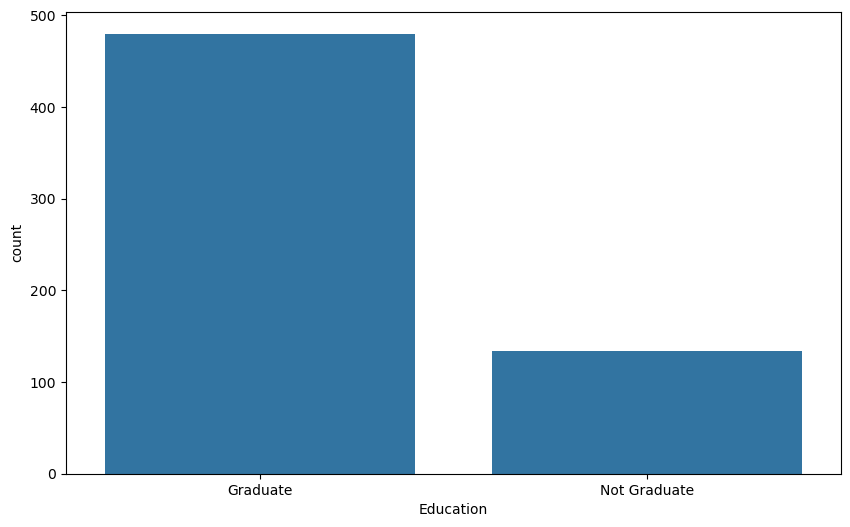

In [222]:
#Plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x='Education', data=data)

<Axes: xlabel='Self_Employed', ylabel='Count'>

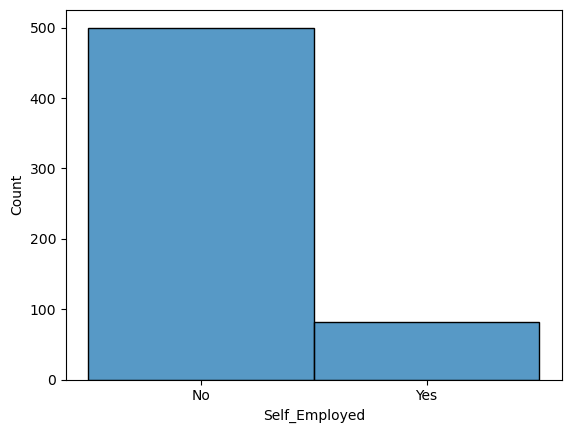

In [223]:
sns.histplot(x='Self_Employed', data=data)

In [224]:
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [225]:
data.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

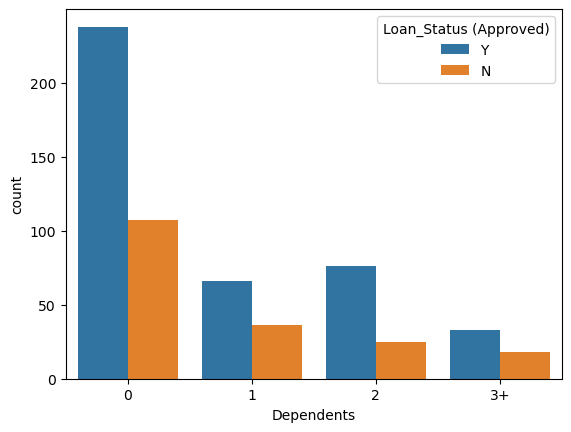

In [226]:
sns.countplot(x='Dependents', data=data, hue = 'Loan_Status (Approved)')

In [227]:
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [228]:
# missing values in Self_Employed column
# use correct column name "Education" and avoid chained assignment
data.loc[
    (data["Education"] == "Not Graduate") & (data["Self_Employed"].isna()),
    "Self_Employed",
] = "Yes"
data.loc[
    (data["Education"] == "Graduate") & (data["Self_Employed"].isna()),
    "Self_Employed",
] = "No"

In [270]:
#handling missing values in LoanAmount column
data['LoanAmount'].fillna(0.1 * data['ApplicantIncome'] + data['CoapplicantIncome'], inplace=True)

C:\Users\bsais\AppData\Local\Temp\ipykernel_4604\2735521534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(0.1 * data['ApplicantIncome'] + data['CoapplicantIncome'], inplace=True)


In [ ]:
#handling missing values in LoanAmountTerm column
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)

In [229]:
#z-score of applicant income
applicant_income_mean = data['ApplicantIncome'].mean()
print("applicant_income_mean", applicant_income_mean)
applicant_income_std = data['ApplicantIncome'].std()
print("applicant_income_std", applicant_income_std)
data['ApplicantIncome'].head()

applicant_income_mean 5403.459283387622
applicant_income_std 6109.041673387174


0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

In [230]:
z1 = (5849 - applicant_income_mean) / applicant_income_std
print("z1", z1)
z2 = (4583 - applicant_income_mean) / applicant_income_std
print("z2", z2)
z3 = (3000 - applicant_income_mean) / applicant_income_std
print("z3", z3)
z4 = (2583 - applicant_income_mean) / applicant_income_std
print("z4", z4)
z5 = (6000 - applicant_income_mean) / applicant_income_std
print("z5", z5)

z1 0.07293135984867927
z2 -0.13430245319192863
z3 -0.3934265653904138
z4 -0.4616860440933629
z5 0.09764882096173755


In [231]:
import scipy.stats as stats
stats.zscore(data['ApplicantIncome'])
data['ApplicantIncome_zscore'] = stats.zscore(data['ApplicantIncome'])
data[['ApplicantIncome', 'ApplicantIncome_zscore']].head()

,ApplicantIncome,ApplicantIncome_zscore
0,5849,0.072991
1,4583,-0.134412
2,3000,-0.393747
3,2583,-0.462062
4,6000,0.097728


In [232]:
#max and min of applicant income
print(data['ApplicantIncome'].max())
print(data['ApplicantIncome'].min())

81000
150


<Axes: ylabel='ApplicantIncome'>

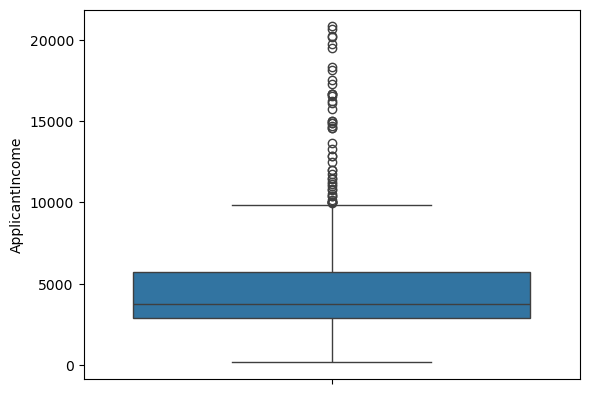

In [233]:
#outliers in applicant income
data['ApplicantIncome'].describe()
data.loc[data['ApplicantIncome_zscore']>3]
data.loc[data['ApplicantIncome_zscore']<-3]
data_no_outliers = data.loc[(data['ApplicantIncome_zscore']<=3) & (data['ApplicantIncome_zscore']>=-3)]
sns.boxplot(data_no_outliers['ApplicantIncome'])

In [234]:
#skewness of applicant income
data['ApplicantIncome'].skew()
print("Skewness of Applicant Income:", data['ApplicantIncome'].skew())
print("acceptable range of skewness is -0.5 to +0.5 for normal distribution")
if data['ApplicantIncome'].skew() > -0.5 and data['ApplicantIncome'].skew() < 0.5:
    print("data is approximately normal")
else:
    print("data is highly skewed (not in acceptable range)")

Skewness of Applicant Income: 6.539513113994625
acceptable range of skewness is -0.5 to +0.5 for normal distribution
data is highly skewed (not in acceptable range)


In [235]:
#kurtosis of applicant income
print("Kurtosis of Applicant Income:", data['ApplicantIncome'].kurtosis())
print("acceptable range of kurtosis is -3 to +3 for normal distribution")
if data['ApplicantIncome'].kurtosis() < -3:
    print("data has light tails")
elif data['ApplicantIncome'].kurtosis() > 3:
    print("data has heavy tails")
else:
    print("data has approximately normal tails")

Kurtosis of Applicant Income: 60.54067593369113
acceptable range of kurtosis is -3 to +3 for normal distribution
data has heavy tails


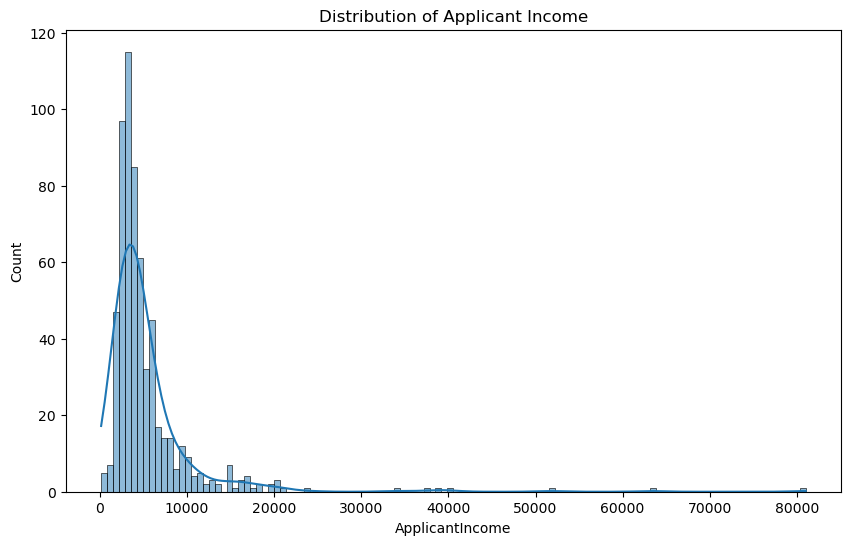

In [236]:
#histogram plot
plt.figure(figsize=(10,6))
sns.histplot(data['ApplicantIncome'], kde=True)
plt.title("Distribution of Applicant Income")
plt.show()

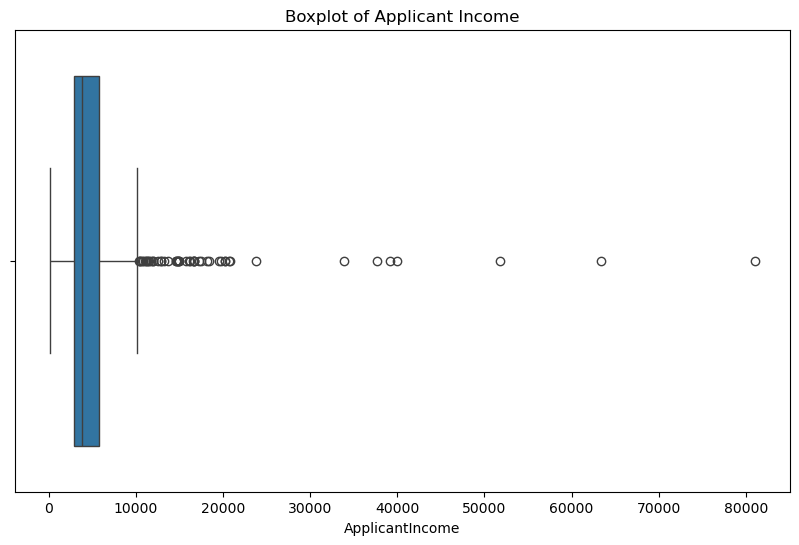

In [237]:
#boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=data['ApplicantIncome'])
plt.title("Boxplot of Applicant Income")
plt.show()

In [238]:
#skewness and kurtosis on coapplicant income
print("Skewness of Coapplicant Income:", data['CoapplicantIncome'].skew())
if data['CoapplicantIncome'].skew() > -0.5 and data['CoapplicantIncome'].skew() < 0.5:
    print("data is approximately normal")
else:
    print("data is highly skewed (not in acceptable range)")
print("Kurtosis of Coapplicant Income:", data['CoapplicantIncome'].kurtosis())
if data['CoapplicantIncome'].kurtosis() < -3:
    print("data has light tails")
elif data['CoapplicantIncome'].kurtosis() > 3:
    print("data has heavy tails")
else:
    print("data has approximately normal tails")

Skewness of Coapplicant Income: 7.491531216657306
data is highly skewed (not in acceptable range)
Kurtosis of Coapplicant Income: 84.95638421103374
data has heavy tails


In [239]:
#skewness and kurtosis on loan amount
print("Skewness of Loan Amount:", data['LoanAmount'].skew())
if data['LoanAmount'].skew() > -0.5 and data['LoanAmount'].skew() < 0.5:
    print("data is approximately normal")
else:
    print("data is highly skewed (not in acceptable range)")
print("Kurtosis of Loan Amount:", data['LoanAmount'].kurtosis())
if data['LoanAmount'].kurtosis() < -3:
    print("data has light tails")
elif data['LoanAmount'].kurtosis() > 3:
    print("data has heavy tails")
else:
    print("data has approximately normal tails")

Skewness of Loan Amount: 2.677551679256059
data is highly skewed (not in acceptable range)
Kurtosis of Loan Amount: 10.40153349029416
data has heavy tails


In [240]:
#skewness and kurtosis on loan amount term
print("Skewness of Loan Amount Term:", data['Loan_Amount_Term'].skew())
if data['Loan_Amount_Term'].skew() > -0.5 and data['Loan_Amount_Term'].skew() < 0.5:
    print("data is approximately normal")
else:
    print("data is highly skewed (not in acceptable range)")
print("Kurtosis of Loan Amount Term:", data['Loan_Amount_Term'].kurtosis())
if data['Loan_Amount_Term'].kurtosis() < -3:
    print("data has light tails")
elif data['Loan_Amount_Term'].kurtosis() > 3:
    print("data has heavy tails")
else:
    print("data has approximately normal tails")

Skewness of Loan Amount Term: -2.362414124216269
data is highly skewed (not in acceptable range)
Kurtosis of Loan Amount Term: 6.673473692814259
data has heavy tails


## One hard encoding for property area

In [241]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [242]:
data["Property_Area"].isna().sum()

np.int64(0)

In [243]:
data["Property_Area"].shape

(614,)

In [244]:
df1 = pd.get_dummies(data["Property_Area"], dtype=int, prefix="PA", drop_first=True)
data = pd.concat([data, df1], axis=1).drop("Property_Area", axis=1)

In [245]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),ApplicantIncome_zscore,PA_Semiurban,PA_Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0.072991,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,-0.134412,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,-0.393747,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,-0.462062,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0.097728,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,-0.410130,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,-0.212557,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0.437174,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0.357064,0,1


## one hard encoding for gender

In [246]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [247]:
#fill the missing values of Gender using mode
data.fillna({'Gender': data['Gender'].mode()[0]}, inplace=True)

In [248]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [249]:
data["Gender"].isna().sum()

np.int64(0)

In [250]:
data["Gender"].shape

(614,)

In [251]:
df1 = pd.get_dummies(data["Gender"], dtype=int, prefix="G", drop_first=True)
data = pd.concat([data, df1], axis=1).drop("Gender", axis=1)

In [252]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),ApplicantIncome_zscore,PA_Semiurban,PA_Urban,G_Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0.072991,0,1,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,-0.134412,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,-0.393747,0,1,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,-0.462062,0,1,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0.097728,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,-0.410130,0,0,0
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,-0.212557,0,0,1
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0.437174,0,1,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0.357064,0,1,1


## one hard encoding for married

In [253]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [254]:
#fill the missing values of Married using mode
data.fillna({'Married': data['Married'].mode()[0]}, inplace=True)

In [255]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [256]:
data["Married"].isna().sum()

np.int64(0)

In [257]:
data["Married"].shape

(614,)

In [258]:
df1 = pd.get_dummies(data["Married"], dtype=int, prefix="M", drop_first=True)
data = pd.concat([data, df1], axis=1).drop("Married", axis=1)

In [259]:
data

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),ApplicantIncome_zscore,PA_Semiurban,PA_Urban,G_Male,M_Yes
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0.072991,0,1,1,0
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,-0.134412,0,0,1,1
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,-0.393747,0,1,1,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,-0.462062,0,1,1,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0.097728,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,-0.410130,0,0,0,0
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,-0.212557,0,0,1,1
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0.437174,0,1,1,1
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0.357064,0,1,1,1


In [260]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [261]:
df1 = pd.get_dummies(data["Education"], dtype=int, prefix="E", drop_first=True)
data = pd.concat([data, df1], axis=1).drop("Education", axis=1)

In [262]:
data

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),ApplicantIncome_zscore,PA_Semiurban,PA_Urban,G_Male,M_Yes,E_Not Graduate
0,LP001002,0,No,5849,0.0,NaN,360.0,1.0,Y,0.072991,0,1,1,0,0
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,N,-0.134412,0,0,1,1,0
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Y,-0.393747,0,1,1,1,0
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Y,-0.462062,0,1,1,1,1
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Y,0.097728,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,2900,0.0,71.0,360.0,1.0,Y,-0.410130,0,0,0,0,0
610,LP002979,3+,No,4106,0.0,40.0,180.0,1.0,Y,-0.212557,0,0,1,1,0
611,LP002983,1,No,8072,240.0,253.0,360.0,1.0,Y,0.437174,0,1,1,1,0
612,LP002984,2,No,7583,0.0,187.0,360.0,1.0,Y,0.357064,0,1,1,1,0


In [263]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [264]:
df1 = pd.get_dummies(data["Self_Employed"], dtype=int, prefix="SE", drop_first=True)
data = pd.concat([data, df1], axis=1).drop("Self_Employed", axis=1)

In [265]:
data

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),ApplicantIncome_zscore,PA_Semiurban,PA_Urban,G_Male,M_Yes,E_Not Graduate,SE_Yes
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Y,0.072991,0,1,1,0,0,0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,-0.134412,0,0,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,-0.393747,0,1,1,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,-0.462062,0,1,1,1,1,0
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0.097728,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,-0.410130,0,0,0,0,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,-0.212557,0,0,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0.437174,0,1,1,1,0,0
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0.357064,0,1,1,1,0,0


In [266]:
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method='yeo-johnson')

In [267]:
la_trans = trans.fit_transform(data[['LoanAmount']])
la_trans.shape

(614, 1)

In [268]:
print("skewness after transformation")
print(pd.Series(la_trans.reshape(614,)).skew())
print("kurtosis after transformation")
print(pd.Series(la_trans.reshape(614,)).kurt())

skewness after transformation
0.01976626758762915
kurtosis after transformation
2.25679928793541
